# Car Fuel Consumption 演習

https://www.kaggle.com/anderas/car-consume

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

## データ読み込みと加工

- データ取得元
  - https://www.kaggle.com/anderas/car-consume/downloads/car-consume.zip/5

- 元データ内の小数の表記が「 10,5 」のような形であったため、これを「 10.5 」のような形式に置換（ pandas の replace 関数を利用）

- また元データ内で、空データが含まれている行を削除（ pandas の dropna 関数を利用）
  - ただし、specials、refill liters、refill gas カラムは、ほとんどが空データであったため、削除対象からは除外
  - 結果的に、temp_incide カラムからのみ、空データ行を削除

- 加工済みデータを表示

In [50]:
# 学習データを CSV ファイルから読み込む
df = pd.read_csv("../../../car-consume/measurements.csv")
# オリジナルのデータを表示
display(df.head(10))

# 小数点を表す文字を「,」から「.」に置換し、データを文字列型から浮動小数点型に変換する
df['distance'] = df['distance'].str.replace(',', '.').astype(float)
df['consume'] = df['consume'].str.replace(',', '.').astype(float)
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

# temp_inside カラムに空文字列データが含まれていれば、その行を削除
df = df.dropna(subset=['temp_inside'])

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


## データを表示

- 加工済みデータの一部と、describe 関数の結果を表示

In [51]:
# データを表示
display(df.head(10))
df.describe()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000
mean,19.797340,4.925266,41.957447,21.929521,11.340426,0.079787,0.12500,0.082447
std,22.988878,1.040705,13.714354,1.010455,7.066999,0.271325,0.33116,0.275411
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.00000,0.000000
25%,11.800000,4.300000,32.000000,21.500000,6.000000,0.000000,0.00000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.00000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.00000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.00000,1.000000


## 散布図行列を描画

- AC、rain、sun カラムについては、カテゴリを表す値（ 1 or 0 ）であり、"説明変数" としてはいったん除外して考えても良さそう？

- consume と speed、temp_outside との間には、やや線形的な関係が見られる（ということか？）

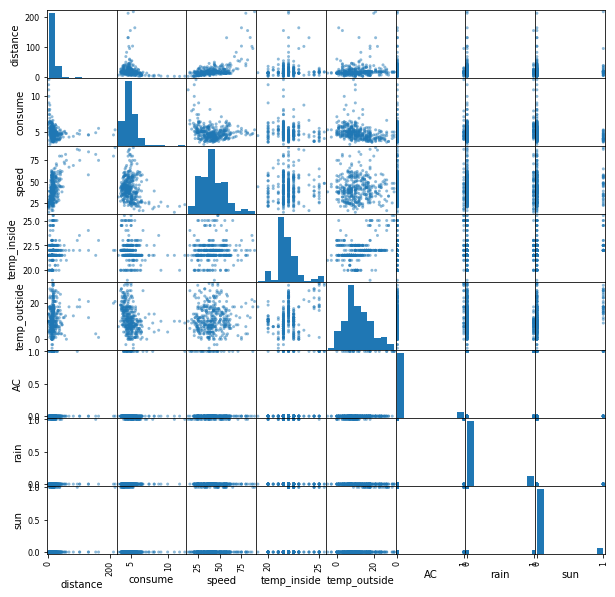

In [49]:
# 散布図行列を描画
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

## 相関係数を表示

- pandas の corr 関数を利用

In [43]:
# 相関係数を確認
df.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.053597,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,0.027015,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.026817,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.053597,0.027015,0.026817,1.000000,0.077181,0.125307,0.011845,0.060782
temp_outside,0.088175,-0.320811,0.015411,0.077181,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.125307,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,0.011845,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.060782,0.346903,0.088598,-0.112650,1.000000


## 相関係数をヒートマップにして可視化

- consume と speed、consume と temp_outside については、やや大きめの「負の」相関が見られる、ということか？

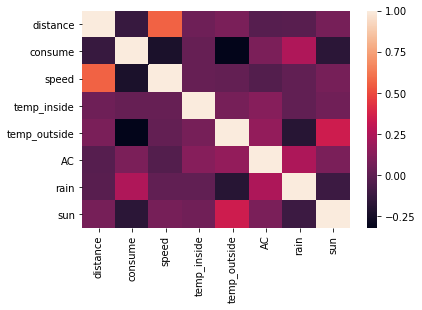

In [44]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df.corr())
plt.show()

## 線形回帰、重みの計算

- 目的変数
  - consume
- 説明変数
  - distance、speed、temp_inside、temp_outside

- 上記の説明変数、目的変数を元に線形回帰を実行、その結果から各重み値を計算する

In [53]:
# 目的変数（ numpy の array に変換）
y = df["consume"].values
# 説明変数（上記の散布図行列などの結果を元に、相関があると思われる distance、speed、temp_inside、temp_outside カラムを採用。numpy の array に変換）
X = df[['distance', 'speed', 'temp_inside', 'temp_outside']].values

# 線形回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]

# 算出した重みの値を表示
print('w0 = {:.3f}\nw1 = {:.3f}\nw2 = {:.3f}\nw3 = {:.3f}\nw4 = {:.3f}'.format(w0, w1, w2, w3, w4))

w0 = 7.106
w1 = 0.002
w2 = -0.019
w3 = -0.042
w4 = -0.045


## 線形回帰結果を元に二乗誤差を計算

In [57]:
# 二乗誤差を算出するために、説明変数のそれぞれのカラムのデータを numpy array に変換して取得
x1 = df['distance'].values
x2 = df['speed'].values
x3 = df['temp_inside'].values
x4 = df['temp_outside'].values

# y の推定値を計算
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4

# 二乗誤差を取得
squared_error = 0.5 * np.sum((y - y_est) ** 2)

# 算出した二乗誤差の値を表示
print('二乗誤差 = {:.3f}'.format(squared_error))

二乗誤差 = 171.364


## MAE、MSE、RMSE を計算

In [58]:
# 値を予測
# （この場合は、predict 関数の結果は、 w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 の結果と等しい、ということか）
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.912
MAE = 0.636
RMSE = 0.955
